In [1]:
cd ..

/Users/yanndubois/Desktop/GitHub/alpaca_eval


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


In [3]:
from alpaca_eval import utils, metrics, annotators, constants, analyze, plotting

analyzer = analyze.Analyzer()

/Users/yanndubois/opt/anaconda3/envs/alpaca_eval/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Found cached dataset alpaca_eval (/Users/yanndubois/.cache/huggingface/datasets/tatsu-lab___alpaca_eval/alpaca_farm_human_crossannotations/1.0.0/68c97c1f4e4fdb6db3c323efdc66941ca5509cf363f14707377ab983a2ca7422)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 211.28it/s]
Found cached dataset alpaca_eval (/Users/yanndubois/.cache/huggingface/datasets/tatsu-lab___alpaca_eval/alpaca_farm_human_annotations/1.0.0/68c97c1f4e4fdb6db3c323efdc66941ca5509cf363f14707377ab983a2ca7422)
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████

In [4]:
df_annotations = analyze.get_annotations(analyzer, annotators.PairwiseAnnotator, 
                                          annotators_config=f"claude")

INFO:root:Creating the annotator from `claude`.
INFO:root:Saving annotations to `/Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/configs/claude/annotations_seed0_configs.json`.
INFO:root:Loading all annotations from /Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/configs/claude/annotations_seed0_configs.json.
INFO:root:Annotating 0 examples with claude
INFO:root:Saving all annotations to /Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/configs/claude/annotations_seed0_configs.json.
INFO:root:Loading all annotations from /Users/yanndubois/Desktop/GitHub/alpaca_eval/src/alpaca_eval/configs/claude/annotations_seed0_configs.json.


In [5]:
from alpaca_eval import utils, metrics, annotators, constants, analyze
import pandas as pd

In [6]:
auto_leaderboard = df_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
auto_leaderboard = auto_leaderboard.sort_values(by="win_rate", ascending=False)


INFO:root:drop 2 outputs that are not[0, 1, 2]


In [7]:
human_leaderboard = analyzer.df_gold_annotations.groupby("generator")["preference"].apply(metrics.pairwise_to_winrate).reset_index().pivot(columns="level_1", index='generator', values='preference')
human_leaderboard = human_leaderboard.sort_values(by="win_rate", ascending=False)


In [8]:
human_leaderboard

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,16.0,805.0,554.0,235.0,1.599801,69.813665
GPT-4 300 characters,17.0,805.0,470.0,318.0,1.712579,59.440994
"AlpacaFarm PPO human (10k, step 40)",7.0,805.0,440.0,358.0,1.746468,55.093168
ChatGPT,11.0,805.0,420.0,374.0,1.748374,52.857143
"AlpacaFarm PPO human (10k, step 80)",5.0,805.0,410.0,390.0,1.757333,51.242236
"AlpacaFarm PPO human (10k, step 200)",8.0,805.0,406.0,391.0,1.754272,50.931677
AlpacaFarm best-of-16 human,8.0,805.0,404.0,393.0,1.754415,50.683230
"AlpacaFarm PPO sim (gpt4 greedy, step 30)",17.0,804.0,396.0,391.0,1.745673,50.310945
AlpacaFarm best-of-4 human,14.0,805.0,397.0,394.0,1.747951,50.186335


In [9]:
auto_leaderboard

level_1,n_draws,n_total,n_wins,n_wins_base,standard_error,win_rate
generator,,,,,,
GPT-4,16.0,805.0,625.0,164.0,1.424043,78.633540
GPT-4 300 characters,17.0,805.0,532.0,256.0,1.636541,67.142857
ChatGPT,11.0,805.0,497.0,297.0,1.695591,62.422360
"AlpacaFarm PPO sim (gpt4 greedy 20k, step 350)",18.0,804.0,460.0,326.0,1.719634,58.333333
AlpacaFarm PPO sim (step 40),1.0,805.0,460.0,344.0,1.743853,57.204969
"AlpacaFarm PPO sim (gpt4 greedy, step 30)",17.0,804.0,446.0,341.0,1.730432,56.529851
"AlpacaFarm PPO human (10k, step 40)",7.0,805.0,450.0,348.0,1.741405,56.335404
AlpacaFarm best-of-128 human,2.0,805.0,450.0,353.0,1.748308,56.024845
AlpacaFarm best-of-16 human,8.0,805.0,421.0,376.0,1.751809,52.795031


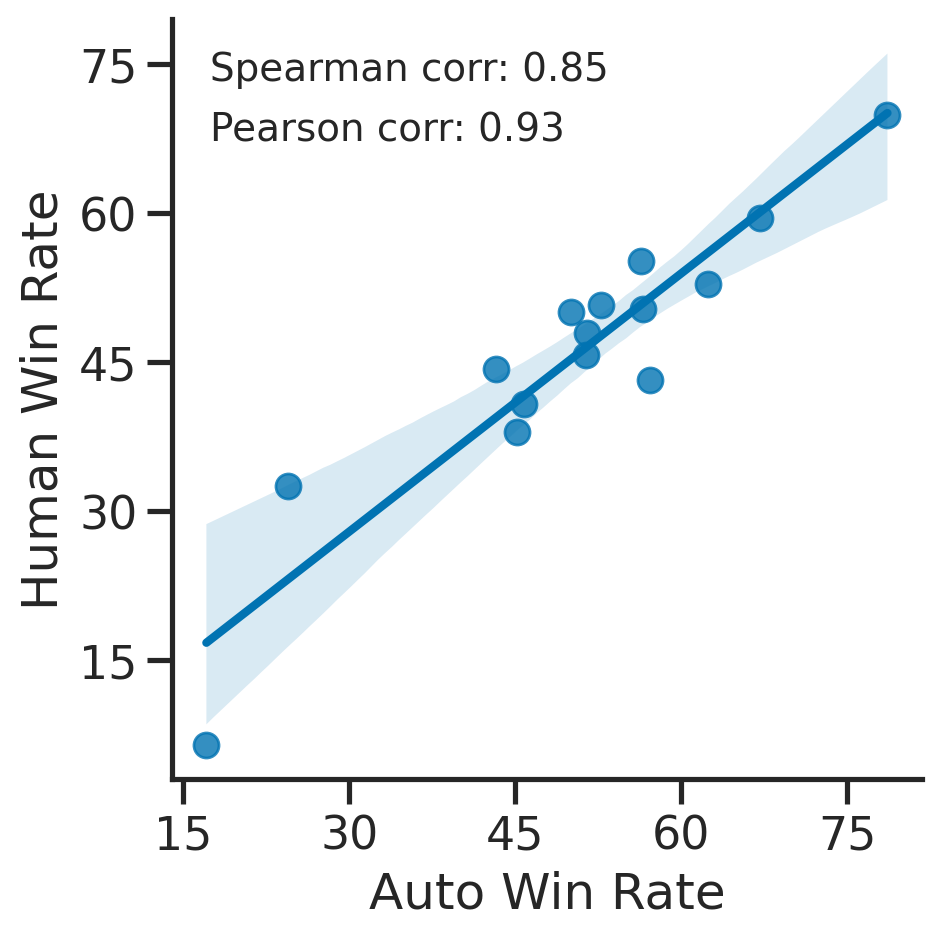

In [10]:
g = plotting.plot_winrate_correlations(human_leaderboard, auto_leaderboard)